<center>
<h1 style="color:red; font-size:70px;"> Vincenzo Nibali</h1>

L'obiettivo di questo JupiterNotebook è quello di imparare ad usare il pacchetto procyclingstats. Per questo motivo farò un po' di analisi sul goat del ciclismo italiano, ossia Vincenzo Nibali.

<center>

![Goat](../Immagini/enzo.png)

In [ ]:
# Importo il profilo di Vincenzo Nibali
from procyclingstats import Rider
from procyclingstats import Stage
import matplotlib.pyplot as plt

In [18]:
def dataset_creation(riderN, years):
    # Funzione che consenta di creare il dataset con i risultati 
    # nelle gare di nostro interesse

    dataset = []
    for y in years:
        # Ciclo sulle varie stagioni
        rider = Rider("rider/" + riderN + "/" + y)
        season = rider.season_results("stage_url", "result", "distance")

        for i in season:
            if i['distance'] and i['result'] is not None:
                stage = Stage(i["stage_url"])  # una sola chiamata per riga

                # Seleziono il nome della tappa
                parti = i["stage_url"].split("/")
                if parti[-1] == 'result':
                    name = parti[1] + " " + parti[2]
                else:
                    name = parti[1] + " " + parti[2] + " " + parti[3]

                
                if stage.stage_type() != 'TTT':
                
                    avgS = stage.avg_speed_winner()
                    altG = stage.vertical_meters()
                    profS = stage.profile_score()
                    if avgS is not None and altG is not None and profS is not None:
                    
                        print(name)
    
                        # Appendo al dataset quanto serve
                        dataset.append([
                            name, 
                            i['result'],
                            i['distance'],
                            avgS,
                            altG,
                            profS, 
                            stage.stage_type(),
                        ])
    
    return dataset

In [19]:
riderN = 'vincenzo-nibali'
years = [str(i) for i in range(2005, 2023)]

nibali_datas = dataset_creation(riderN, years)

il-lombardia 2005
world-championship-itt 2006
il-lombardia 2007
world-championship-itt 2007
giro-d-italia 2007 stage-20
giro-d-italia 2007 stage-19
giro-d-italia 2007 stage-18
giro-d-italia 2007 stage-17
giro-d-italia 2007 stage-16
giro-d-italia 2007 stage-15
giro-d-italia 2007 stage-14
giro-d-italia 2007 stage-13
giro-d-italia 2007 stage-12
giro-d-italia 2007 stage-11
giro-d-italia 2007 stage-10
giro-d-italia 2007 stage-9
giro-d-italia 2007 stage-8
giro-d-italia 2007 stage-7
giro-d-italia 2007 stage-6
giro-d-italia 2007 stage-5
giro-d-italia 2007 stage-4
giro-d-italia 2007 stage-3
giro-d-italia 2007 stage-2
il-lombardia 2008
olympic-games-itt 2008
tour-de-france 2008 stage-20
tour-de-france 2008 stage-19
tour-de-france 2008 stage-18
tour-de-france 2008 stage-17
tour-de-france 2008 stage-16
tour-de-france 2008 stage-15
tour-de-france 2008 stage-14
tour-de-france 2008 stage-13
tour-de-france 2008 stage-12
tour-de-france 2008 stage-11
tour-de-france 2008 stage-10
tour-de-france 2008 stag

In [26]:
res = []
lenS = []
meanV = []
highG = []

# Filtro i dati che voglio plottare
for i in nibali_datas:
    res.append(i[1])
    lenS.append(i[2])
    meanV.append(i[3])
    highG.append(i[4])

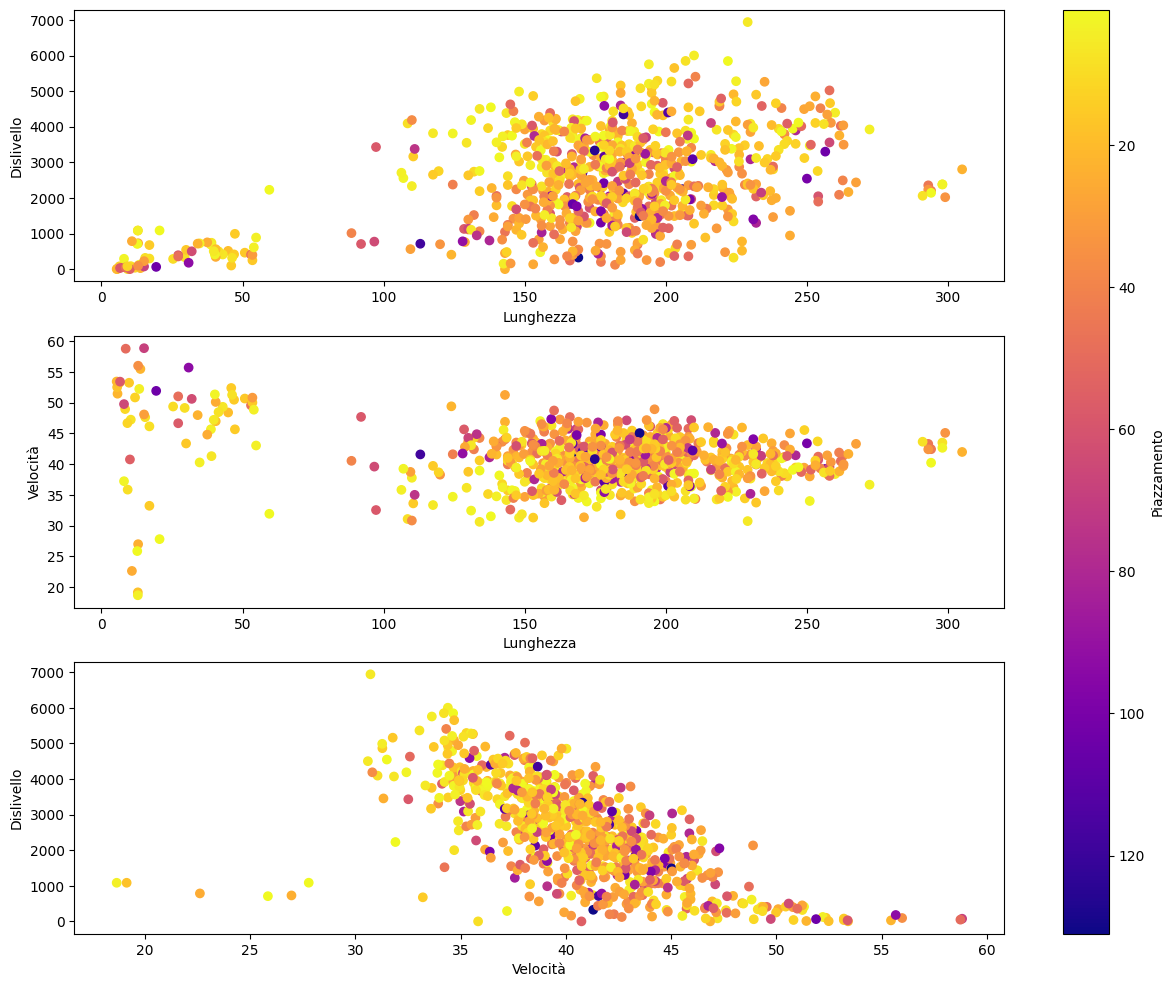

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize=(15, 12))

# Procediamo con lo studio delle variabili d'interesse
sc1 = ax1.scatter(lenS, highG, c=res, cmap='plasma_r', vmin=min(res), vmax=max(res))
ax1.set_xlabel('Lunghezza')
ax1.set_ylabel('Dislivello')

sc2 = ax2.scatter(lenS, meanV, c=res, cmap='plasma_r', vmin=min(res), vmax=max(res))
ax2.set_xlabel('Lunghezza')
ax2.set_ylabel('Velocità')

sc3 = ax3.scatter(meanV, highG, c=res, cmap='plasma_r', vmin=min(res), vmax=max(res))
ax3.set_xlabel('Velocità')
ax3.set_ylabel('Dislivello')

# Aggiungi barra colori condivisa
cbar = fig.colorbar(sc1, ax=(ax1, ax2, ax3), label='Piazzamento')
cbar.ax.invert_yaxis() 
plt.show()

In [ ]:
with open("../Datasets/nibali.dataset", "w") as f:
    for row in nibali_datas:
        f.write(" ".join(map(str, row)) + "\n")